Bike sharing polynomial features
---

Exercise - Load and split the data, set the baseline
---

> **Exercise**: Load the data set. Encode categorical variables with one-hot encoding. Split the data into train/test sets with the `train_test_split()` function from Scikit-learn (50-50 split, `random_state=0`). Fit a linear regression and compare its performance to the median baseline using the mean absolute error (MAE) measure.

In [193]:
import pandas as pd
import numpy as np
import os

In [194]:
# Load data
data_df = pd.read_csv((os.path.join('data', 'bike-sharing.csv')))
data_df.head()

,temp,hum,windspeed,yr,workingday,holiday,weekday,season,weathersit,casual
0,0.344,0.806,0.160,2011,no,no,6,spring,cloudy,331
1,0.363,0.696,0.249,2011,no,no,0,spring,cloudy,131
2,0.196,0.437,0.248,2011,yes,no,1,spring,clear,120
3,0.200,0.590,0.160,2011,yes,no,2,spring,clear,108
4,0.227,0.437,0.187,2011,yes,no,3,spring,clear,82


In [195]:
x_df = data_df.drop(['casual'], axis = 1)
x_df

,temp,hum,windspeed,yr,workingday,holiday,weekday,season,weathersit
0,0.344,0.806,0.160,2011,no,no,6,spring,cloudy
1,0.363,0.696,0.249,2011,no,no,0,spring,cloudy
2,0.196,0.437,0.248,2011,yes,no,1,spring,clear
3,0.200,0.590,0.160,2011,yes,no,2,spring,clear
4,0.227,0.437,0.187,2011,yes,no,3,spring,clear
...,...,...,...,...,...,...,...,...,...
726,0.254,0.653,0.350,2012,yes,no,4,spring,cloudy
727,0.253,0.590,0.155,2012,yes,no,5,spring,cloudy
728,0.253,0.753,0.124,2012,no,no,6,spring,cloudy
729,0.256,0.483,0.351,2012,no,no,0,spring,clear


In [196]:
x = data_df.drop(['casual'], axis = 1).values
y = data_df.casual.values

In [197]:
# Encode categorical variables
encoded_df = pd.get_dummies(data_df, columns = ['yr','workingday', 'holiday', 'weekday', 'season', 'weathersit'], drop_first = True)

In [198]:
encoded_df.head()

,temp,hum,windspeed,casual,yr_2012,workingday_yes,holiday_yes,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_spring,season_summer,season_winter,weathersit_cloudy,weathersit_rainy
0,0.344,0.806,0.160,331,0,0,0,0,0,0,0,0,1,1,0,0,1,0
1,0.363,0.696,0.249,131,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.196,0.437,0.248,120,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,0.200,0.590,0.160,108,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,0.227,0.437,0.187,82,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [199]:
# Split into train/test sets
from sklearn.model_selection import train_test_split

In [200]:
train_df, test_df = train_test_split(encoded_df, train_size = 0.5, test_size = 0.5, random_state = 0)

In [201]:
print('Train DataFrame:', train_df.shape)
print('Test DataFrame:', test_df.shape)

Train DataFrame: (365, 18)
Test DataFrame: (366, 18)


In [202]:
x_tr = train_df.drop(['casual'], axis = 1).values
y_tr = train_df.casual.values

x_te = test_df.drop(['casual'], axis = 1).values
y_te = test_df.casual.values

In [203]:
x_tr.shape

(365, 17)

In [204]:
x_te.shape

(366, 17)

In [205]:
y_tr.shape

(365,)

In [206]:
y_te.shape

(366,)

In [207]:
# Mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y-y_pred))

In [208]:
# Median baseline
pred_baseline = np.mean(y_tr)

In [209]:
from sklearn.linear_model import LinearRegression, Ridge

In [210]:
mae_baseline = MAE(y_te, pred_baseline)

In [211]:
ridge = Ridge(alpha = 1e-4)
ridge.fit(x_tr, y_tr)
y_pred_ridge = ridge.predict(x_te)

In [212]:
# Median baseline
mae_baseline = MAE(y_te, np.median(y_tr))

# Linear regression
mae_lr = MAE(y_te, y_pred_ridge)

print('MAE baseline: {:.3f}'.format(mae_baseline))
print('MAE linear regression: {:.3f}'.format(mae_lr))

MAE baseline: 503.574
MAE linear regression: 261.714


Another way of fitiing a model is to define a function.

In [213]:
def fit_model(X_train, y_train, X_test):
    # Create the model
    # Note: Using ridge with a small alpha to avoid ill-conditioning issues
    model = Ridge(alpha=1e-4) # or LinearRegression()
    
    # Fit it to train data
    model.fit(X_train, y_train)
    
    # Compute predictions for test set
    y_pred = np.maximum(
        model.predict(X_test),
        50 # set a lower limit
    )
    
    return y_pred

In [215]:
# Median baseline
mae_baseline = MAE(y_te, np.median(y_tr))
y_pred_ridge = fit_model(x_tr, y_tr, x_te)

mae_lr = MAE(y_te, y_pred)

print('MAE baseline: {:.3f}'.format(mae_baseline))
print('MAE linear regression: {:.3f}'.format(mae_lr))

MAE baseline: 503.574
MAE linear regression: 261.714


Exercise - Add polynomial features
---

> **Exercise**: Add the `temp^2` and `temp^3` polynomial features. Then fit and evaluate a linear regression. Plot your model with a scatter plot of temperatures vs. number of users. Feel free to add other features.

In [105]:
data_df.head()

,temp,hum,windspeed,yr,workingday,holiday,weekday,season,weathersit,casual
0,0.344,0.806,0.160,2011,no,no,6,spring,cloudy,331
1,0.363,0.696,0.249,2011,no,no,0,spring,cloudy,131
2,0.196,0.437,0.248,2011,yes,no,1,spring,clear,120
3,0.200,0.590,0.160,2011,yes,no,2,spring,clear,108
4,0.227,0.437,0.187,2011,yes,no,3,spring,clear,82


we create the features on the onehot encoded dataframe

In [144]:
x2_tr = train_df.temp.values
y2_tr = train_df.casual.values

# Add polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly_f = PolynomialFeatures(degree = 2)
poly_f.fit(x2_tr[:, np.newaxis])
X2_tr_pol = poly_f.transform(x2_tr[:, np.newaxis])
poly_f.get_feature_names()

['1', 'x0', 'x0^2']

In [140]:
X2_tr_pol.shape

(365, 3)

In [145]:
others = train_df.drop(['temp', 'casual'], axis = 1).values

In [146]:
X2_tr = np.c_[X2_tr_pol, others]

In [159]:
def create_polyfeatures(df):
    temp = df.temp.values
    others = df.drop(['temp', 'casual'], axis = 1).values

    poly = PolynomialFeatures(degree = 2)
    poly.fit(temp[:, np.newaxis])
    temp_augmented = poly.transform(temp[:, np.newaxis])
                                    
    return np.c_[temp_augmented, others]

another way of creating polynomial features:

In [123]:
# Function to add features
def create_features(df):
    temp = df.temp.values
    others = df.drop(['temp', 'casual'], axis=1).values
    return np.c_[temp, temp**2, temp**3, others]

create polynomial features for the test and train dataset.

In [149]:
# Create new input matrices
X_tr2 = create_polyfeatures(train_df)
X_te2 = create_polyfeatures(test_df)

In [150]:
y_pred2_te = fit_model(X_tr2, y2_tr, X_te2)

In [151]:
# Fit a linear regression
mae_lr2 = MAE(y_te, y_pred2_te)
print('MAE lr with new features: {:.3f}'.format(mae_lr2))

MAE lr with new features: 228.975


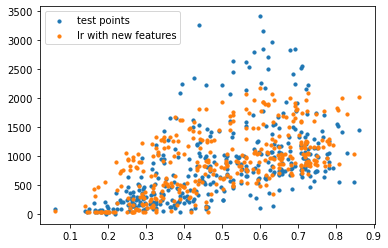

In [152]:
# Plot predictions
%matplotlib inline
import matplotlib.pyplot as plt


plt.scatter(test_df.temp, test_df.casual, s=10, label = 'test points')
plt.scatter(test_df.temp, y_pred2_te, s=10, label = 'lr with new features')
plt.legend()
plt.show()

Exercise - Separate sources
---

In the last exercise, we saw that we can identify two sources in the data.

1. Data points collected during working days
1. Data points collected during non-working days

The goal of this exercise is to create a model for each source using your extended set of features, e.g., the original features plus the `temp^2`, `temp^3` polynomial features.

> **Exercise**: Create a model for each source with the extended set of features, and evaluate the overall performance on the test set using MAE. Plot the two models with a scatter plot of temperatures vs. number of users. Create a final comparison using a bar chart.

In [153]:
data_df.head()

,temp,hum,windspeed,yr,workingday,holiday,weekday,season,weathersit,casual
0,0.344,0.806,0.160,2011,no,no,6,spring,cloudy,331
1,0.363,0.696,0.249,2011,no,no,0,spring,cloudy,131
2,0.196,0.437,0.248,2011,yes,no,1,spring,clear,120
3,0.200,0.590,0.160,2011,yes,no,2,spring,clear,108
4,0.227,0.437,0.187,2011,yes,no,3,spring,clear,82


In [154]:
encoded_df.head()

,temp,hum,windspeed,casual,yr_2012,workingday_yes,holiday_yes,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_spring,season_summer,season_winter,weathersit_cloudy,weathersit_rainy
0,0.344,0.806,0.160,331,0,0,0,0,0,0,0,0,1,1,0,0,1,0
1,0.363,0.696,0.249,131,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.196,0.437,0.248,120,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,0.200,0.590,0.160,108,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,0.227,0.437,0.187,82,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [155]:
train_df.head()

,temp,hum,windspeed,casual,yr_2012,workingday_yes,holiday_yes,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_spring,season_summer,season_winter,weathersit_cloudy,weathersit_rainy
692,0.368,0.569,0.148,1603,1,1,0,0,0,0,0,1,0,0,0,1,0,0
237,0.700,0.761,0.084,768,0,1,0,0,0,0,0,1,0,0,0,0,0,0
56,0.282,0.538,0.187,424,0,0,0,0,0,0,0,0,1,1,0,0,0,0
60,0.335,0.450,0.308,231,0,1,0,0,0,1,0,0,0,1,0,0,0,0
467,0.398,0.466,0.290,663,1,1,0,0,0,0,1,0,0,0,1,0,0,0


In [156]:
# Separate data points
train_df_wd = train_df[train_df.workingday_yes == 1]
train_df_nwd = train_df[train_df.workingday_yes == 0]

test_df_wd = test_df[test_df.workingday_yes == 1]
test_df_nwd = test_df[test_df.workingday_yes == 0]

In [170]:
test_df_wd.head()

,temp,hum,windspeed,casual,yr_2012,workingday_yes,holiday_yes,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_spring,season_summer,season_winter,weathersit_cloudy,weathersit_rainy
187,0.750,0.651,0.159,754,0,1,0,0,0,0,1,0,0,0,0,0,0,0
31,0.192,0.830,0.053,47,0,1,0,0,1,0,0,0,0,1,0,0,1,0
390,0.342,0.770,0.073,244,1,1,0,0,0,0,1,0,0,1,0,0,1,0
319,0.457,0.930,0.137,145,0,1,0,0,0,1,0,0,0,0,0,1,0,1
299,0.470,0.813,0.198,240,0,1,0,0,0,0,1,0,0,0,0,1,1,0


In [171]:
test_df_nwd.head()

,temp,hum,windspeed,casual,yr_2012,workingday_yes,holiday_yes,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_spring,season_summer,season_winter,weathersit_cloudy,weathersit_rainy
196,0.687,0.585,0.208,2418,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14,0.233,0.499,0.158,222,0,0,0,0,0,0,0,0,1,1,0,0,1,0
462,0.438,0.254,0.275,3252,1,0,0,0,0,0,0,0,1,0,1,0,0,0
679,0.389,0.645,0.058,2090,1,0,0,0,0,0,0,0,1,0,0,1,0,0
728,0.253,0.753,0.124,159,1,0,0,0,0,0,0,0,1,1,0,0,1,0


In [186]:
temp_te_wdnwd = np.concatenate([test_df_wd.temp, test_df_nwd.temp])

In [161]:
# Fit a linear regression for working days (wd)
# and one for non-working days (nwd)
y_pred_wd_te = fit_model(
            create_polyfeatures(train_df_wd),
            train_df_wd.casual,
            create_polyfeatures(test_df_wd)
               )

y_pred_nwd_te = fit_model(
            create_polyfeatures(train_df_nwd),
            train_df_nwd.casual,
            create_polyfeatures(test_df_nwd)
               )

y_pred_wd_nwd_te = np.concatenate([y_pred_wd_te, y_pred_nwd_te])
y_wd_nwd_te = np.concatenate([test_df_wd.casual, test_df_nwd.casual])

# Compute overall performance with MAE
mae_wdnwd = MAE(y_wd_nwd_te, y_pred_wd_nwd_te)
print('MAE two sources: {:.3f}'.format(mae_wdnwd))

MAE two sources: 194.688


In [187]:
temp_te_wdnwd = np.concatenate([test_df_wd.temp, test_df_nwd.temp])

In [179]:
temp_te_wd_nwd

array([0.75 , 0.192, 0.342, 0.457, 0.47 , 0.452, 0.203, 0.144, 0.325,
       0.364, 0.708, 0.747, 0.635, 0.583, 0.303, 0.43 , 0.707, 0.319,
       0.848, 0.657, 0.655, 0.447, 0.373, 0.777, 0.415, 0.458, 0.617,
       0.408, 0.718, 0.514, 0.742, 0.464, 0.656, 0.71 , 0.325, 0.456,
       0.731, 0.266, 0.527, 0.623, 0.602, 0.599, 0.564, 0.528, 0.358,
       0.506, 0.717, 0.468, 0.476, 0.565, 0.721, 0.722, 0.639, 0.718,
       0.564, 0.632, 0.169, 0.389, 0.782, 0.766, 0.573, 0.752, 0.732,
       0.265, 0.595, 0.458, 0.436, 0.514, 0.282, 0.588, 0.619, 0.428,
       0.684, 0.65 , 0.678, 0.651, 0.617, 0.55 , 0.434, 0.272, 0.733,
       0.522, 0.53 , 0.649, 0.292, 0.541, 0.54 , 0.182, 0.428, 0.294,
       0.545, 0.549, 0.511, 0.51 , 0.666, 0.381, 0.336, 0.564, 0.658,
       0.34 , 0.751, 0.634, 0.217, 0.637, 0.417, 0.589, 0.582, 0.266,
       0.782, 0.262, 0.648, 0.38 , 0.598, 0.277, 0.661, 0.395, 0.438,
       0.344, 0.484, 0.655, 0.323, 0.503, 0.595, 0.343, 0.502, 0.628,
       0.658, 0.685,

or another way of computing itis:

In [177]:
test_wd_nwd = pd.concat([test_df_wd, test_df_nwd])
temp_te_wd_nwd = test_wd_nwd.temp

,temp,hum,windspeed,casual,yr_2012,workingday_yes,holiday_yes,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_spring,season_summer,season_winter,weathersit_cloudy,weathersit_rainy
187,0.750,0.651,0.159,754,0,1,0,0,0,0,1,0,0,0,0,0,0,0
31,0.192,0.830,0.053,47,0,1,0,0,1,0,0,0,0,1,0,0,1,0
390,0.342,0.770,0.073,244,1,1,0,0,0,0,1,0,0,1,0,0,1,0
319,0.457,0.930,0.137,145,0,1,0,0,0,1,0,0,0,0,0,1,0,1
299,0.470,0.813,0.198,240,0,1,0,0,0,0,1,0,0,0,0,1,1,0


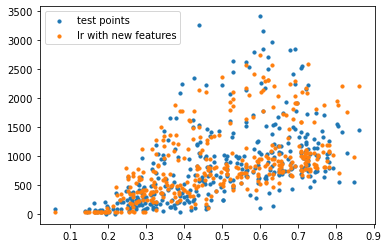

In [188]:
# Plot predictions
test_df_wdnwd = np.concatenate([test_df_wd, test_df_nwd])

plt.scatter(test_df.temp, test_df.casual, s=10, label = 'test points')
plt.scatter(temp_te_wdnwd, y_pred_wd_nwd_te, s=10, label = 'lr with new features')
plt.legend()
plt.show()

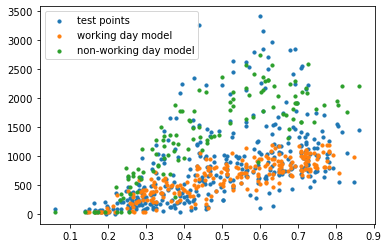

In [192]:
# Plot predictions
temp_te_wdnwd = np.concatenate([test_df_wd.temp, test_df_nwd.temp])
plt.scatter(temp_te_wdnwd, y_wd_nwd_te, s=10, label='test points')
plt.scatter(test_df_wd.temp, y_pred_wd_te, s=10, label='working day model')
plt.scatter(test_df_nwd.temp, y_pred_nwd_te, s=10, label='non-working day model')

plt.legend()
plt.show()

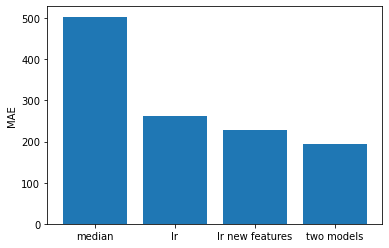

In [184]:
# Final comparison
mae_values = [mae_baseline, mae_lr, mae_lr2, mae_wdnwd]
titles = ['median', 'lr', 'lr new features', 'two models']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel('MAE')
plt.show()